# 岭回归

## 岭回归模型

![jupyter](./class_ten_1.png)

当自变量个数多于样本量或者自变量间存在多重共线性时，回归系数的估计值β将无法求解

![jupyter](./class_ten_2.png)

岭回归模型，在线性回归模型的目标函数之上添加一个L2的正则项，进而使得模型的回归系数有解

![jupyter](./class_ten_3.png)

## 岭回归应用

### 模型的lambda求解

#### 图形法
sklearn的子模块linear_model中的Ridge

Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)  
alpha：用于指定lambda值的参数，默认为1  
fit_intercept：bool类型参数，是否需要拟合截距项，默认为True  
normalize：bool类型参数，建模时是否需要对数据集做标准化处理，默认为False  
copy_X：bool类型参数，是否复制自变量X的数值，默认为True  
max_iter：用于指定模型的最大迭代次数  
tol：用于指定模型收敛的阈值  
solver：用于指定模型求解最优化问题的算法，默认为'auto'，表示模型根据数据集自动选择算法  
random_state：用于指定随机数生成的种子

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import Ridge,RidgeCV
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_excel(r'./data_class/diabetes.xlsx')
diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [7]:
#剔除患者的性别、AGE和因变量Y
predict_columns = diabetes.columns[2:-1]
predict_columns

Index(['BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'], dtype='object')

In [8]:
#拆分数据集
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(diabetes[predict_columns], diabetes['Y'], test_size=0.2, random_state=1234)

In [9]:
X_train.head()

,BMI,BP,S1,S2,S3,S4,S5,S6
138,36.7,117.0,166,93.8,44.0,4.0,4.9488,109
382,32.0,88.0,172,69.0,38.0,4.0,5.7838,100
351,22.6,85.0,130,71.0,48.0,3.0,4.0073,81
373,25.4,93.0,141,79.0,49.0,3.0,4.1744,91
192,23.5,97.0,203,129.0,59.0,3.0,4.3175,77


In [10]:
Y_train.head()

138    336
382    132
351     71
373    168
192     91
Name: Y, dtype: int64

In [12]:
#构造不同的lambda值
Lambdas = np.logspace(-5, 2, 200)
Lambdas

array([1.00000000e-05, 1.08436597e-05, 1.17584955e-05, 1.27505124e-05,
       1.38262217e-05, 1.49926843e-05, 1.62575567e-05, 1.76291412e-05,
       1.91164408e-05, 2.07292178e-05, 2.24780583e-05, 2.43744415e-05,
       2.64308149e-05, 2.86606762e-05, 3.10786619e-05, 3.37006433e-05,
       3.65438307e-05, 3.96268864e-05, 4.29700470e-05, 4.65952567e-05,
       5.05263107e-05, 5.47890118e-05, 5.94113398e-05, 6.44236351e-05,
       6.98587975e-05, 7.57525026e-05, 8.21434358e-05, 8.90735464e-05,
       9.65883224e-05, 1.04737090e-04, 1.13573336e-04, 1.23155060e-04,
       1.33545156e-04, 1.44811823e-04, 1.57029012e-04, 1.70276917e-04,
       1.84642494e-04, 2.00220037e-04, 2.17111795e-04, 2.35428641e-04,
       2.55290807e-04, 2.76828663e-04, 3.00183581e-04, 3.25508860e-04,
       3.52970730e-04, 3.82749448e-04, 4.15040476e-04, 4.50055768e-04,
       4.88025158e-04, 5.29197874e-04, 5.73844165e-04, 6.22257084e-04,
       6.74754405e-04, 7.31680714e-04, 7.93409667e-04, 8.60346442e-04,
      

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

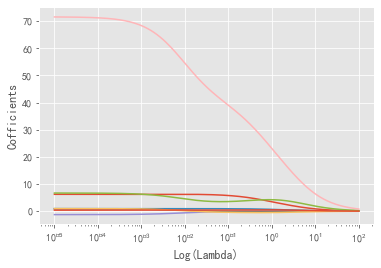

In [14]:
#构造空列表，用于存储模型的偏回归系数
ridge_cofficients = []

#循环迭代不同的lambda值
for Lambda in Lambdas:
    ridge = Ridge(alpha = Lambda, normalize=True)
    ridge.fit(X_train, Y_train)
    ridge_cofficients.append(ridge.coef_)

#绘制alpha的对数与回归系数的关系
#设置绘图风格
plt.style.use('ggplot')
plt.plot(Lambdas, ridge_cofficients)
#对x轴做对数处理
plt.xscale('log')
plt.xlabel('Log(Lambda)')
plt.ylabel('Cofficients')
plt.show()

按照Lambda的选择标准，Lambda=0.01时，绝大多数变量的回归系数趋于稳定，则取Lambda=0.01比较合适

#### 交叉验证法确定

![jupyter](./class_ten_40.png)

K组交叉验证：  
首先将数据集拆分成k个样本量大体相当的数据组，并且每个数据组和其他组都没有重叠的观测  
然后从k组数据中挑出k-1组数据用于模型的训练，剩下一组数据用于模型的测试  
以此类推将会得到k组训练集和测试集，每一组训练集和测试集都会对应一种模型和模型得分  
所以对于每一个给定的lambda值都会得到k个模型以及对应的得分，最终以平均得分评估模型的优良  

RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=none, gv_mode=None, store_cv_values=False)  
alphas：用于指定多个lambda值得元组或者数组对象，默认参数包含0.1、1和10三种值  
fit_intercept：bool类型参数，是否需要拟合截距项，默认为True  
normalize：bool类型参数，建模时是否需要对数据集做标准化处理，默认为False  
scoring：指定用于评估模型的度量方法  
cv：指定交叉验证的重数  
gcv_mode：用于指定执行广义交叉验证的方法，当样本量大于特征数或自变量矩阵X为稀疏矩阵时，该参数使用'auto'；当该参数为'svd'时，表示通过矩阵X的奇异值分解方法执行广义交叉验证；当该参数为'engin'时，则表示通过矩阵XT\*X的特征根分解方法执行广义交叉验证  
store_cv_values：bool类型参数，是否在每一个Lambda值下都保存交叉验证得到的评估信息，默认为False，只有当cv参数为None时有效  

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import Ridge,RidgeCV
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_excel(r'./data_class/diabetes.xlsx')
diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
#剔除患者的性别、AGE和因变量Y
predict_columns = diabetes.columns[2:-1]
predict_columns

Index(['BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'], dtype='object')

In [4]:
#拆分数据集
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(diabetes[predict_columns], diabetes['Y'], test_size=0.2, random_state=1234)

In [11]:
Lambdas = np.logspace(-5, 2, 200)
Lambdas

array([1.00000000e-05, 1.08436597e-05, 1.17584955e-05, 1.27505124e-05,
       1.38262217e-05, 1.49926843e-05, 1.62575567e-05, 1.76291412e-05,
       1.91164408e-05, 2.07292178e-05, 2.24780583e-05, 2.43744415e-05,
       2.64308149e-05, 2.86606762e-05, 3.10786619e-05, 3.37006433e-05,
       3.65438307e-05, 3.96268864e-05, 4.29700470e-05, 4.65952567e-05,
       5.05263107e-05, 5.47890118e-05, 5.94113398e-05, 6.44236351e-05,
       6.98587975e-05, 7.57525026e-05, 8.21434358e-05, 8.90735464e-05,
       9.65883224e-05, 1.04737090e-04, 1.13573336e-04, 1.23155060e-04,
       1.33545156e-04, 1.44811823e-04, 1.57029012e-04, 1.70276917e-04,
       1.84642494e-04, 2.00220037e-04, 2.17111795e-04, 2.35428641e-04,
       2.55290807e-04, 2.76828663e-04, 3.00183581e-04, 3.25508860e-04,
       3.52970730e-04, 3.82749448e-04, 4.15040476e-04, 4.50055768e-04,
       4.88025158e-04, 5.29197874e-04, 5.73844165e-04, 6.22257084e-04,
       6.74754405e-04, 7.31680714e-04, 7.93409667e-04, 8.60346442e-04,
      

In [12]:
#设置交叉验证的参数，对于每一个λ值，都执行10重交叉验证
ridge_cv = RidgeCV(alphas=Lambdas, normalize=True, scoring='neg_mean_squared_error', cv=10)

In [13]:
#模型拟合
ridge_cv.fit(X_train, Y_train)

RidgeCV(alphas=array([1.00000000e-05, 1.08436597e-05, 1.17584955e-05, 1.27505124e-05,
       1.38262217e-05, 1.49926843e-05, 1.62575567e-05, 1.76291412e-05,
       1.91164408e-05, 2.07292178e-05, 2.24780583e-05, 2.43744415e-05,
       2.64308149e-05, 2.86606762e-05, 3.10786619e-05, 3.37006433e-05,
       3.65438307e-05, 3.96268864e-05, 4.29700470e-05, 4.65952567e-05,
       5.05263107e-05, 5.47890118e-0...
       2.14614120e+01, 2.32720248e+01, 2.52353917e+01, 2.73644000e+01,
       2.96730241e+01, 3.21764175e+01, 3.48910121e+01, 3.78346262e+01,
       4.10265811e+01, 4.44878283e+01, 4.82410870e+01, 5.23109931e+01,
       5.67242607e+01, 6.15098579e+01, 6.66991966e+01, 7.23263390e+01,
       7.84282206e+01, 8.50448934e+01, 9.22197882e+01, 1.00000000e+02]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [14]:
ridge_best_Lambda = ridge_cv.alpha_
ridge_best_Lambda

0.014649713983072863

### 建立模型

In [15]:
#基于最佳的Lambda值建模
ridge = Ridge(alpha=ridge_best_Lambda, normalize=True)
ridge.fit(X_train, Y_train)

Ridge(alpha=0.014649713983072863, normalize=True)

In [16]:
#返回岭回归系数
pd.Series(index=['intercept']+X_train.columns.tolist(), data=[ridge.intercept_] + ridge.coef_.tolist())

intercept   -321.996227
BMI            6.206337
BP             0.927093
S1            -0.479414
S2             0.202203
S3             0.016912
S4             4.183247
S5            51.424829
S6             0.384342
dtype: float64

岭回归模型表达式为：Y = -322.00 + 6.21BMI + 0.93BP - 0.48S1 + 0.20S2 + 0.17S3 + 4.18S4 + 51.42S5 + 0.38S6

### 模型预测

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
#模型预测
ridge_predict = ridge.predict(X_test)

In [19]:
#预测效果验证
RMSE = np.sqrt(mean_squared_error(Y_test, ridge_predict))
RMSE

53.11911788753518

![jupyter](./class_ten_5.png)

RMSE：均方根误差  
n代表预测集中的样本量，yt尖代表因变量的预测值，yt代表因变量的实际值  
RMSE值越小，说明模型对数据的拟合效果越好

# lasso

## lasso回归模型

![jupyter](./class_ten_6.png)

岭回归模型解决线性回归模型中矩阵x'x不可逆的办法是添加l2正则的惩罚项，但缺陷在于始终保留建模时的所有变量，无法降低模型的复杂度。lasso采用了l1正则的惩罚项，将惩罚项中的平方和改成了绝对值。

![jupyter](./class_ten_7.png)

## lasso回归应用

### 模型的lambda求解

#### 图形法

Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic)  
alpha：用于指定lambda值的参数，默认该参数为1  
fit_intercept：bool类型参数，是否需要拟合截距项，默认为True  
normalize：bool类型参数，建模时是否需要对数据集进行标准化处理，默认为False  
precompute：bool类型参数，是否在建模前通过计算Gram矩阵提升运算速度，默认为False  
copy_X：bool类型参数，是否复制自变量X的数值，默认为True  
max_iter：用于指定模型的最大迭代次数，默认为1000  
tol：用于指定模型收敛的阈值，默认为0.0001  
warm_start：bool类型参数，是否将前一次的训练结果用作后一次的训练，默认为False  
positive：bool类型参数，是否将回归系数强制为正数，默认为False  
random_state：用于指定随机数生成器的种子  
selection：指定每次迭代时所选择的回归系数，如果为'random'，表示每次迭代中将随机更新回归系数；如果为'cyclic'，则表示每次迭代时回归系数的更新都基于上一次的运算  

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import Lasso, LassoCV
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_excel(r'./data_class/diabetes.xlsx')
diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
#剔除患者的性别、AGE和因变量Y
predict_columns = diabetes.columns[2:-1]
predict_columns

Index(['BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'], dtype='object')

In [4]:
#拆分数据集
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(diabetes[predict_columns], diabetes['Y'], test_size=0.2, random_state=1234)

In [5]:
X_train.head()

,BMI,BP,S1,S2,S3,S4,S5,S6
138,36.7,117.0,166,93.8,44.0,4.0,4.9488,109
382,32.0,88.0,172,69.0,38.0,4.0,5.7838,100
351,22.6,85.0,130,71.0,48.0,3.0,4.0073,81
373,25.4,93.0,141,79.0,49.0,3.0,4.1744,91
192,23.5,97.0,203,129.0,59.0,3.0,4.3175,77


In [6]:
Y_train.head()

138    336
382    132
351     71
373    168
192     91
Name: Y, dtype: int64

In [7]:
#构造不同的lambda值
Lambdas = np.logspace(-5, 2, 200)
Lambdas

array([1.00000000e-05, 1.08436597e-05, 1.17584955e-05, 1.27505124e-05,
       1.38262217e-05, 1.49926843e-05, 1.62575567e-05, 1.76291412e-05,
       1.91164408e-05, 2.07292178e-05, 2.24780583e-05, 2.43744415e-05,
       2.64308149e-05, 2.86606762e-05, 3.10786619e-05, 3.37006433e-05,
       3.65438307e-05, 3.96268864e-05, 4.29700470e-05, 4.65952567e-05,
       5.05263107e-05, 5.47890118e-05, 5.94113398e-05, 6.44236351e-05,
       6.98587975e-05, 7.57525026e-05, 8.21434358e-05, 8.90735464e-05,
       9.65883224e-05, 1.04737090e-04, 1.13573336e-04, 1.23155060e-04,
       1.33545156e-04, 1.44811823e-04, 1.57029012e-04, 1.70276917e-04,
       1.84642494e-04, 2.00220037e-04, 2.17111795e-04, 2.35428641e-04,
       2.55290807e-04, 2.76828663e-04, 3.00183581e-04, 3.25508860e-04,
       3.52970730e-04, 3.82749448e-04, 4.15040476e-04, 4.50055768e-04,
       4.88025158e-04, 5.29197874e-04, 5.73844165e-04, 6.22257084e-04,
       6.74754405e-04, 7.31680714e-04, 7.93409667e-04, 8.60346442e-04,
      

In [8]:
#构造空列表，用于储存模型的偏回归系数  
lasso_cofficients = []
for Lambda in Lambdas:
    lasso = Lasso(alpha=Lambda, normalize=True, max_iter=10000)
    lasso.fit(X_train, Y_train)
    lasso_cofficients.append(lasso.coef_)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

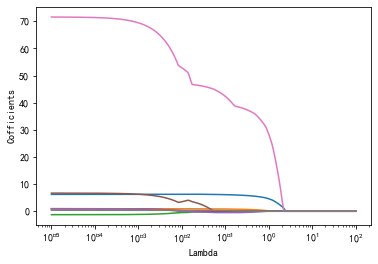

In [11]:
#绘制lambda与回归系数的折线图
plt.plot(Lambdas, lasso_cofficients)

#x轴做对数变换
plt.xscale('log')

plt.xlabel('Lambda')
plt.ylabel('Cofficients')
plt.show()

与岭回归模型绘制的折线图类似，出现了喇叭形折线，说明该变量存在多存共线性  
当λ值位于0.05左右时，绝大多数变量的回归系数趋于稳定

#### 交叉验证法确定λ值

LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', max_iter=1000, tol=0.0001, copy_X=true, cv=None, verbose=False, n_jobs=1, positive=False, random_state=None, selection='cyclic')  
eps：指定正则化路径长度，默认为0.001，指代Lambda的最小值与最大值之商  
n_alphas：指定正则项系数Lambda的个数，默认为100个  
alphas：指定具体的Lambda值列表用于模型运算  
fit_intercept：bool类型参数，是否需要拟合截距项，默认为True  
normalize：bool类型参数，建模时是否需要对数据集做标准化处理，默认为False  
precompute：bool类型参数，是否在建模前，通过计算Gram矩阵提升运算速度，默认为False  
max_iter：指定模型最大的迭代次数，默认为1000次  
tol：用于指定模型收敛的阈值，默认为0.001  
copy_X：bool类型参数，是否复制自变量X的数值，默认为True  
cv：指定交叉验证的重数  
verbose：bool类型参数，是否返回模型运行的详细信息，默认为False  
n_jobs：指定交叉验证过程中使用的CPU数量，即是否需要并行处理，默认为1，表示不并行处理；如果为-1，表示将所有的cpu用于交叉验证的运算  
positive：bool类型参数，是否将回归系数强制为正数，默认为False  
random_state：用于指定随机数生成的种子  
selection：指定每次迭代时所选择的回归系数，如果为'random'，表示每次迭代中将随机更新回归系数；如果为'cyclic'，则表示每次迭代时回归系数的更新都基于上一次的运算  

In [12]:
#lasso回归模型的交叉验证
lasso_cv = LassoCV(alphas=Lambdas, normalize=True, cv=10, max_iter=10000)
lasso_cv.fit(X_train, Y_train)

LassoCV(alphas=array([1.00000000e-05, 1.08436597e-05, 1.17584955e-05, 1.27505124e-05,
       1.38262217e-05, 1.49926843e-05, 1.62575567e-05, 1.76291412e-05,
       1.91164408e-05, 2.07292178e-05, 2.24780583e-05, 2.43744415e-05,
       2.64308149e-05, 2.86606762e-05, 3.10786619e-05, 3.37006433e-05,
       3.65438307e-05, 3.96268864e-05, 4.29700470e-05, 4.65952567e-05,
       5.05263107e-05, 5.47890118e-0...
       1.55222536e+01, 1.68318035e+01, 1.82518349e+01, 1.97916687e+01,
       2.14614120e+01, 2.32720248e+01, 2.52353917e+01, 2.73644000e+01,
       2.96730241e+01, 3.21764175e+01, 3.48910121e+01, 3.78346262e+01,
       4.10265811e+01, 4.44878283e+01, 4.82410870e+01, 5.23109931e+01,
       5.67242607e+01, 6.15098579e+01, 6.66991966e+01, 7.23263390e+01,
       7.84282206e+01, 8.50448934e+01, 9.22197882e+01, 1.00000000e+02]),
        cv=10, max_iter=10000, normalize=True)

In [13]:
#输出最佳lambda值
lasso_best_alpha = lasso_cv.alpha_
lasso_best_alpha

0.06294988990221888

### 建立模型

In [14]:
#基于最佳lambda值建模
lasso = Lasso(alpha=lasso_best_alpha, normalize=True, max_iter=10000)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.06294988990221888, max_iter=10000, normalize=True)

In [15]:
#返回lasso回归系数
pd.Series(index=['Intercept'] + X_train.columns.tolist(), data=[lasso.intercept_] + lasso.coef_.tolist())

Intercept   -278.560358
BMI            6.188602
BP             0.860826
S1            -0.127627
S2            -0.000000
S3            -0.488408
S4             0.000000
S5            44.487738
S6             0.324076
dtype: float64

最终模型：
Y = -278.56 + 6.19BMI + 0.86BP - 0.13S1 - 0.49S3 + 44.49S5 + 0.32S6

### 模型预测

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
#模型预测
lasso_predict = lasso.predict(X_test)

In [18]:
#预测效果验证
RMSE = np.sqrt(mean_squared_error(Y_test, lasso_predict))
RMSE

53.06143725822572

# 与多元线性回归模型的比较

In [19]:
from statsmodels import api as sms

In [20]:
#为自变量x添加常数列1， 用于拟合截距项
X_train2 = sms.add_constant(X_train)
X_test2 = sms.add_constant(X_test)

In [21]:
#构建多元线性回归模型
linear = sms.OLS(Y_train, X_train2).fit()

In [22]:
#返回线性回归模型的系数
linear.params

const   -406.699716
BMI        6.217649
BP         0.948245
S1        -1.264772
S2         0.901368
S3         0.962373
S4         6.694215
S5        71.614661
S6         0.376004
dtype: float64

最终模型：
Y = -406.70 + 6.22BMI + 0.95BP - 1.26S1 + 0.90S2 + 0.96S3 + 6.70S4 + 71.61S5 + 0.38S6

In [23]:
#模型的预测
linear_predict = linear.predict(X_test2)

In [24]:
#模型预测效果验证
RMSE = np.sqrt(mean_squared_error(Y_test, linear_predict))
RMSE

53.42623939722996

# 使用函数以及说明

## sklearn

Ridge：用于设定岭回归模型的“类”  
RidgeCV：用于设定岭回归交叉验证的“类”  
Lasso：用于设定LASSO回归模型的“类”  
LassoCV：用于设定LASSO回归交叉验证的“类”  
fit：基于“类”的模型拟合“方法”  
alpha_：用于返回岭回归和LASSO回归的自变量系数  
predict：基于模型的预测“方法”  
mean_squarred_error：计算均方差误差MSE的函数，如需要计算RMSE，还需要对其开根号  

## statsmodels

add_constant：用于给数组添加常数列1的函数  
OLS：用于设定多元线性回归模型的“类”